In [2]:
import Graphics.Color.Demo
import Graphics.Color.Space
import Graphics.Image as I
:set -XDataKinds

In [3]:
:t ColorHSI
:t ColorHSL
:t ColorHSV
:t ColorCMYK
:t ColorYCbCr

ColorHSI :: forall e cs. e -> e -> e -> Color (HSI cs) e

ColorHSL :: forall e cs. e -> e -> e -> Color (HSL cs) e

ColorHSV :: forall e cs. e -> e -> e -> Color (HSV cs) e

ColorCMYK :: forall e cs. e -> e -> e -> e -> Color (CMYK cs) e

ColorYCbCr :: forall e cs. e -> e -> e -> Color (YCbCr cs) e

<HSI-SRGB 'NonLinear:( 0.35163470, 0.74999960, 0.40001696)>

<HSL-SRGB 'NonLinear:( 0.35417180, 0.80002797, 0.50001020)>

<HSV-SRGB 'NonLinear:( 0.35417180, 0.88888600, 0.90001600)>

<CMYK-SRGB 'NonLinear:( 0.88888600, 0.00000000, 0.77774780, 0.09998399)>

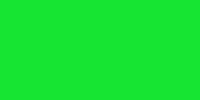

In [4]:
sRGB = ColorRGB 0.1 0.9 0.2 :: Color (SRGB 'NonLinear) Float
print (convertColor sRGB :: Color (HSI (SRGB 'NonLinear)) Float)
print (convertColor sRGB :: Color (HSL (SRGB 'NonLinear)) Float)
print (convertColor sRGB :: Color (HSV (SRGB 'NonLinear)) Float)
print (convertColor sRGB :: Color (CMYK (SRGB 'NonLinear)) Float)
displayColor sRGB

Y :: forall e i. e -> Color (Y i) e

<Y * D65:( 0.5676782526130566)>

<XYZ * D65:( 0.2916874417127031, 0.5676782526130566, 0.1255190613184867)>

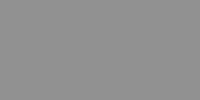

In [27]:
:t Y
luminance sRGB
toColorXYZ sRGB
displayColor $ luminance sRGB

In [68]:
:t ColorYCbCr
print (convertColor sRGB :: Color (YCbCr (SRGB 'NonLinear)) Float)

ColorYCbCr :: forall e cs. e -> e -> e -> Color (YCbCr cs) e

<YCbCr-SRGB 'NonLinear:( 0.58101420, 0.28499803, 0.15691143)>

In [66]:
:t Y'
rgbLuma sRGB :: Color Y' Float

Y' :: forall e. e -> Color Y' e

<Y':( 0.58100003)>

readImage :: forall cs e (m :: * -> *). (ColorModel cs e, MonadIO m) => FilePath -> m (Image cs e)

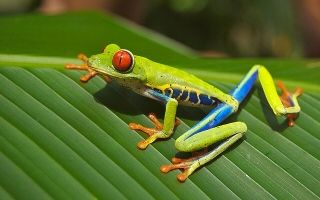

In [74]:
:t readImage
readImage "files/frog.jpg" :: IO (I.Image (YCbCr (SRGB 'NonLinear)) Word8)

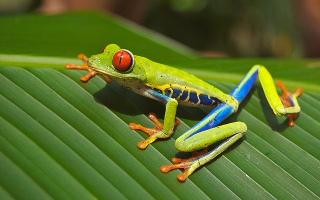

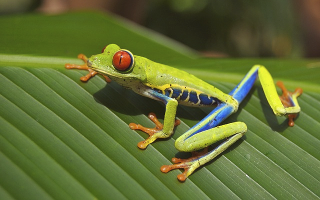

In [82]:
frogSRGB <- readImage "files/frog.jpg" :: IO (I.Image (YCbCr (SRGB 'NonLinear)) Word8)
frogAdobeRGB = I.map convertPixel frogSRGB :: I.Image (AdobeRGB 'NonLinear) Word8
frogAdobeRGB
I.map (liftPixel (mkColorRGB . unColorRGB)) frogAdobeRGB :: I.Image (SRGB 'NonLinear) Word8